In [7]:
import nbimporter
from Hamiltonian_solver import *

In [9]:
def TransitionStrength_S12_P32(b, theta_k = 0, theta_p = 0):
    _, v_P32, _, _ = P32_Energy_at(b)
    _, v_s12, _ = S12_Energy_at(b)
    tk = theta_k * np.pi / 180
    tp = theta_p * np.pi / 180
    G = np.array([
        0 * abs(np.cos(tp) * np.sin(2 * tk) - 2j * np.sin(tp) * np.sin(tk)),
        1  * abs(1j * np.sin(tp) * np.cos(tk) + np.cos(tp) * np.cos(2 * tk)),
        np.sqrt(6) / 4 * abs(np.cos(tp) * np.sin(2 * tk)),
        1  * abs(1j * np.sin(tp) * np.cos(tk) - np.cos(tp) * np.cos(2 * tk)),
        0 * abs(np.cos(tp) * np.sin(2 * tk) - 2j * np.sin(tp) * np.sin(tk))
    ])
    G = np.array([0,1,1,1,0])
    col_P32, row_P32, c_P32 = generateLabels_P32(1.5, 1.5, v_P32)
    col_S12, row_S12, c_S12 = generateLabels_S12(0.5, 1.5, v_s12)
    row_map_P = {s: i for i, s in enumerate(row_P32)}
    # print(c_S12)
    row_map_S = {s: i for i, s in enumerate(row_S12)}
    ts = np.zeros((len(col_P32), len(col_S12)))
    for i_p, lbl_p in enumerate(col_P32):
        F_P, mF_P = parseLabel(lbl_p)
        for i_s, lbl_s in enumerate(col_S12):
            F_S, mF_S = parseLabel(lbl_s)
            if abs(mF_P - mF_S) <= 1:
                s = 0
                for mJ_P in [-1.5, -0.5, 0.5, 1.5]:
                    for mI_P in [-1.5, -0.5, 0.5, 1.5]:
                        for mJ_S in [-0.5, 0.5]:
                            mI_S = mI_P
                            idx_P = row_map_P[f'{mI_P:.1f},{mJ_P:.1f}']
                            idx_S = row_map_S[f'{mI_S:.1f},{mJ_S:.1f}']
                            c_p = c_P32.iloc[idx_P, i_p]
                            c_s = c_S12.iloc[idx_S, i_s]
                            # print(idx_P, idx_S, c_p, c_s)
                            if c_p and c_s:
                                s += c_p * c_s * clebschgordan1(0.5, mJ_S, 1, mJ_P - mJ_S, 1.5, mJ_P)
                if s != 0:
                    ts[abs(i_p - 15), abs(i_s-7)] = abs(G[int(mF_P - mF_S + 2)] * s)
    return ts

In [11]:
TPS = TransitionStrength_S12_P32(4.209)

In [13]:
def normalize_rows(a):
    return a / a.sum(axis=1, keepdims=True)

Probability_TPS = np.array(TPS)**2

normalized_prob_matrix_TPS = normalize_rows(Probability_TPS[9:,:5])

with np.printoptions(threshold=np.inf,   
                     linewidth=300,      
                     precision=5,         
                     suppress=True):  
    print(Probability_TPS)
    print(normalized_prob_matrix_TPS)


[[0.      0.00001 0.00001 0.00001 0.      0.3246  0.33327 0.34211]
 [0.10105 0.04966 0.01627 0.      0.      0.      0.41392 0.41911]
 [0.      0.05087 0.06666 0.04913 0.      0.42345 0.00009 0.40981]
 [0.      0.      0.01707 0.05034 0.09895 0.41422 0.41942 0.     ]
 [0.3345  0.16587 0.      0.      0.      0.      0.      0.49963]
 [0.16608 0.08461 0.24949 0.      0.      0.      0.25226 0.24756]
 [0.      0.24981 0.00001 0.25018 0.      0.08491 0.33331 0.08178]
 [0.      0.      0.25051 0.08206 0.16725 0.25245 0.24774 0.     ]
 [0.      0.      0.      0.16747 0.33217 0.50037 0.      0.     ]
 [1.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.33217 0.66783 0.      0.      0.      0.      0.      0.     ]
 [0.0662  0.5324  0.4014  0.      0.      0.      0.      0.     ]
 [0.      0.19895 0.6     0.20105 0.      0.      0.      0.     ]
 [0.      0.      0.3986  0.53426 0.06713 0.      0.      0.     ]
 [0.      0.      0.      0.6655  0.3345  0.      0.      0.  

In [15]:
def TransitionStrength_D52_P32(b, theta_k = 0, theta_p = 0):
    _, v_d52, _, _ = Energy_at(b)
    _, v_p32, _, _ = P32_Energy_at(b)
    tk = theta_k * np.pi / 180
    tp = theta_p * np.pi / 180
    G = np.array([
        0.25 * abs(np.cos(tp) * np.sin(2 * tk) - 2j * np.sin(tp) * np.sin(tk)),
        0.5  * abs(1j * np.sin(tp) * np.cos(tk) + np.cos(tp) * np.cos(2 * tk)),
        np.sqrt(6) / 4 * abs(np.cos(tp) * np.sin(2 * tk)),
        0.5  * abs(1j * np.sin(tp) * np.cos(tk) - np.cos(tp) * np.cos(2 * tk)),
        0.25 * abs(np.cos(tp) * np.sin(2 * tk) - 2j * np.sin(tp) * np.sin(tk))
    ])
    G = np.array([0,1,0,1,0])
    col_D52, row_D52, c_D52 = generateLabels_D52(2.5, 1.5, v_d52)
    col_P32, row_P32, c_P32 = generateLabels_P32(1.5, 1.5, v_p32)
    row_map_D = {s: i for i, s in enumerate(row_D52)}
    # print(c_P32)
    row_map_P = {s: i for i, s in enumerate(row_P32)}
    ts = np.zeros((len(col_D52), len(col_P32)))
    for i_d, lbl_d in enumerate(col_D52):
        F_D, mF_D = parseLabel(lbl_d)
        for i_p, lbl_p in enumerate(col_P32):
            F_P, mF_P = parseLabel(lbl_p)
            if abs(mF_D - mF_P) <= 1:
                s = 0
                for mJ_D in [-2.5, -1.5, -0.5, 0.5, 1.5, 2.5]:
                    for mI_D in [-1.5, -0.5, 0.5, 1.5]:
                        for mJ_P in [-1.5, -0.5, 0.5, 1.5]:
                            mI_P = mI_D
                            idx_D = row_map_D[f'{mI_D:.1f},{mJ_D:.1f}']
                            idx_P = row_map_P[f'{mI_P:.1f},{mJ_P:.1f}']
                            c_d = c_D52.iloc[idx_D, i_d]
                            c_p = c_P32.iloc[idx_P, i_p]
                            # print(idx_D, idx_P, c_d, c_p)
                            if c_d and c_p:
                                s += c_d * c_p * clebschgordan1(1.5, mJ_P, 1, mJ_D - mJ_P, 2.5, mJ_D)
                if s != 0:
                    ts[abs(i_d - 23), i_p] = abs(G[int(mF_D - mF_P + 2)] * s)
    return ts

In [17]:
TDP = TransitionStrength_D52_P32(4.209)

In [18]:
with np.printoptions(threshold=np.inf,   
                     linewidth=300,      
                     precision=5,         
                     suppress=True):  
    print(TDP)

[[0.      0.      0.      0.00576 0.      0.0071  0.      0.      0.      0.10858 0.      0.146   0.      0.52566 0.      0.69868]
 [0.      0.      0.0096  0.      0.00625 0.      0.      0.      0.16773 0.      0.08022 0.      0.50369 0.      0.43988 0.     ]
 [0.      0.01101 0.      0.00375 0.      0.      0.      0.20579 0.      0.03155 0.      0.      0.      0.411   0.      0.70881]
 [0.      0.      0.      0.      0.05734 0.      0.10308 0.      0.      0.      0.39933 0.      0.      0.      0.78979 0.     ]
 [0.      0.      0.      0.08981 0.      0.07021 0.      0.      0.      0.46726 0.      0.33004 0.      0.51566 0.      0.06289]
 [0.      0.      0.11367 0.      0.04411 0.      0.      0.      0.44524 0.      0.38181 0.      0.27129 0.      0.36951 0.     ]
 [0.      0.12983 0.      0.02443 0.      0.      0.      0.34546 0.      0.35964 0.      0.      0.      0.6014  0.      0.0739 ]
 [0.139   0.      0.01058 0.      0.      0.      0.      0.      0.27606 0.      0

In [19]:
Probability_TDP = np.array(TDP)**2

normalized_prob_matrix_TDP = normalize_rows(Probability_TDP[:, :7])

with np.printoptions(threshold=np.inf,   
                     linewidth=300,      
                     precision=5,         
                     suppress=True):  
    print(normalized_prob_matrix_TDP)


[[0.      0.      0.      0.39701 0.      0.60299 0.     ]
 [0.      0.      0.70261 0.      0.29739 0.      0.     ]
 [0.      0.89618 0.      0.10382 0.      0.      0.     ]
 [0.      0.      0.      0.      0.23631 0.      0.76369]
 [0.      0.      0.      0.62067 0.      0.37933 0.     ]
 [0.      0.      0.8691  0.      0.1309  0.      0.     ]
 [0.      0.96579 0.      0.03421 0.      0.      0.     ]
 [0.99424 0.      0.00576 0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      1.      0.     ]
 [0.      0.      0.      0.      0.9944  0.      0.0056 ]
 [0.      0.      0.      0.99969 0.      0.00031 0.     ]
 [0.      0.      0.96387 0.      0.03613 0.      0.     ]
 [0.      0.7894  0.      0.2106  0.      0.      0.     ]
 [0.38436 0.      0.61564 0.      0.      0.      0.     ]
 [0.      1.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      1.     ]
 [0.      0.      0.      0.      0.      1.      0.    

In [23]:
Probability_Repump_DS = normalized_prob_matrix_TDP @ normalized_prob_matrix_TPS


Probability_TDP = np.array(TDP)**2
with np.printoptions(threshold=np.inf,   
                     linewidth=300,      
                     precision=5,         
                     suppress=True):  
    print(Probability_Repump_DS)

[[0.      0.07899 0.2382  0.48111 0.2017 ]
 [0.04651 0.37407 0.40057 0.15889 0.01997]
 [0.29768 0.61916 0.06229 0.02087 0.     ]
 [0.      0.      0.09419 0.12625 0.77956]
 [0.      0.12348 0.3724  0.37723 0.12689]
 [0.05754 0.46271 0.40104 0.06993 0.00879]
 [0.3208  0.6518  0.02052 0.00688 0.     ]
 [0.99462 0.00307 0.00231 0.      0.     ]
 [0.      0.      0.      0.6655  0.3345 ]
 [0.      0.      0.39637 0.53127 0.07236]
 [0.      0.19889 0.59981 0.20119 0.0001 ]
 [0.06381 0.51316 0.4013  0.0193  0.00243]
 [0.26221 0.56909 0.12636 0.04234 0.     ]
 [0.42511 0.32777 0.24712 0.      0.     ]
 [0.33217 0.66783 0.      0.      0.     ]
 [0.      0.      0.      0.      1.     ]
 [0.      0.      0.      0.6655  0.3345 ]
 [0.      0.      0.2418  0.3241  0.43409]
 [0.      0.0389  0.11733 0.57468 0.26909]
 [0.00225 0.0181  0.3987  0.5161  0.06485]
 [0.00028 0.19935 0.59948 0.20088 0.     ]
 [0.06848 0.5311  0.40042 0.      0.     ]
 [0.33217 0.66783 0.      0.      0.     ]
 [1.      0

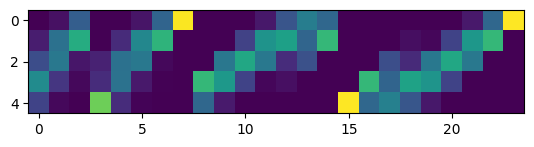

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(Probability_Repump_DS.T)
plt.show()

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_14900\1055496474.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis').copy()


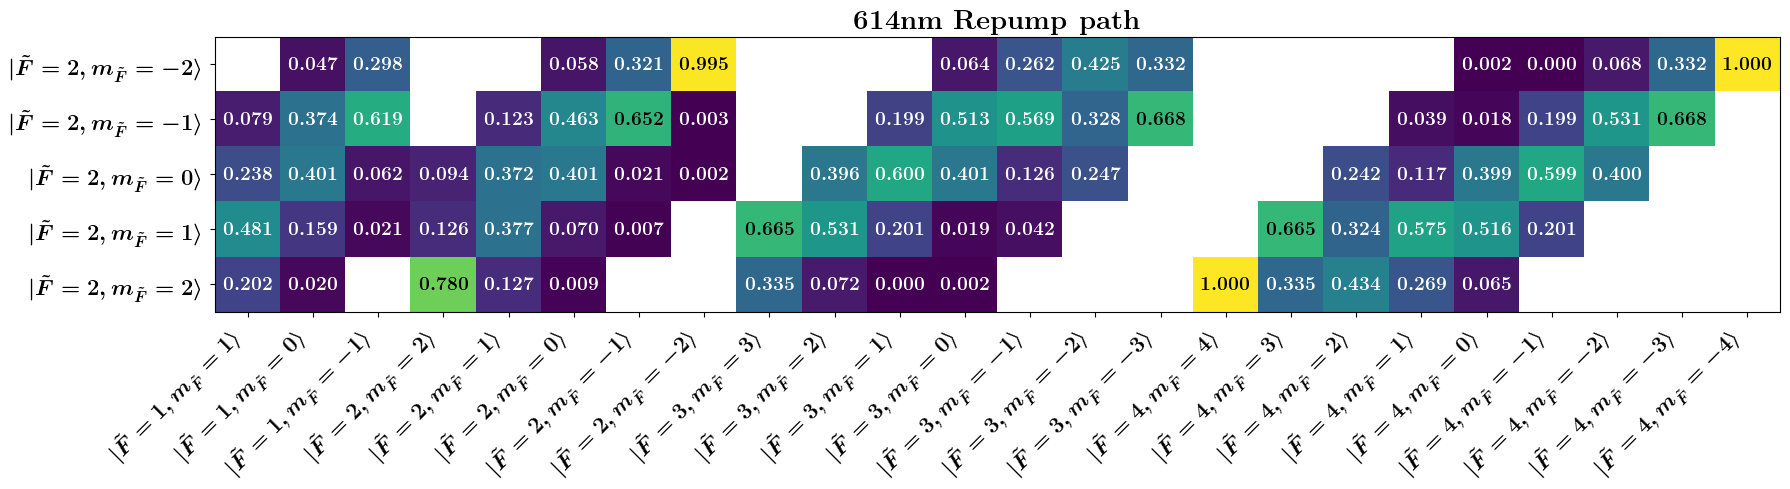

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
from matplotlib import rcParams
import matplotlib.lines as mlines
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 28      # Title of the plot
rcParams['axes.labelsize'] = 20      # Axis labels
rcParams['xtick.labelsize'] = 14     # X tick labels
rcParams['ytick.labelsize'] = 14     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 28    # Figure-wide title (if used)

pi_times = Probability_Repump_DS.astype(float).T  # Transpose to make it horizontal
pi_times[pi_times == 0] = np.nan  # Convert zeros to NaN

Fs = [1, 2, 3, 4]
row_labels = []
for i in Fs:
    for j in range(2 * i + 1):
        mF = i - j
        row_labels.append([i, mF])
col_labels = [-2, -1, 0, 1, 2]

ket_lables_row = [rf'\boldmath$|\tilde{{F}} = {i[0]}, m_{{\tilde{{F}}}} = {i[1]}\rangle$' for i in row_labels]
ket_lables_col = [rf'\boldmath$|\tilde{{F}} = 2, m_{{\tilde{{F}}}} = {i}\rangle$' for i in col_labels]

fig, ax = plt.subplots(figsize=(18, 5))

# Mask NaN values
masked_data = np.ma.masked_invalid(pi_times)

# Use colormap with white for NaNs
cmap = cm.get_cmap('viridis').copy()
cmap.set_bad(color='white')

# Show matrix
cax = ax.imshow(masked_data, aspect='auto', cmap=cmap)

# Ticks and labels
ax.set_xticks(np.arange(len(row_labels)))
ax.set_yticks(np.arange(len(col_labels)))
ax.set_xticklabels(ket_lables_row, rotation=45, ha='right', fontsize=16)
ax.set_yticklabels(ket_lables_col, fontsize=16)

# Add gridlines between cells
ax.set_xticks(np.arange(-0.5, len(row_labels), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(col_labels), 1), minor=True)
ax.tick_params(which='minor', bottom=False, left=False)

# Normalize for colorbar
norm = Normalize(vmin=np.nanmin(pi_times), vmax=np.nanmax(pi_times))
sm = ScalarMappable(norm=norm, cmap=cmap)

# Commented out annotations
for i in range(len(col_labels)):
    for j in range(len(row_labels)):
        value = pi_times[i, j]
        if not np.isnan(value):
            color = sm.to_rgba(value)
            luminance = 0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2]
            text_color = 'white' if luminance < 0.5 else 'black'
            ax.text(j, i, rf'\boldmath${value:.3f}$', ha='center', va='center', color=text_color, fontsize=14)

# Add colorbar
# cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
# cbar.set_label('Probability', fontsize=12)

# Title and layout
ax.set_title(r'\textbf{614nm Repump path}', fontsize=20)
plt.tight_layout()
plt.savefig('614nm_repump_path.svg')
plt.show()
